## EDA with Titanic dataset

입문예제와도 같은 타이타닉 데이터셋. 
https://www.kaggle.com/c/titanic/data

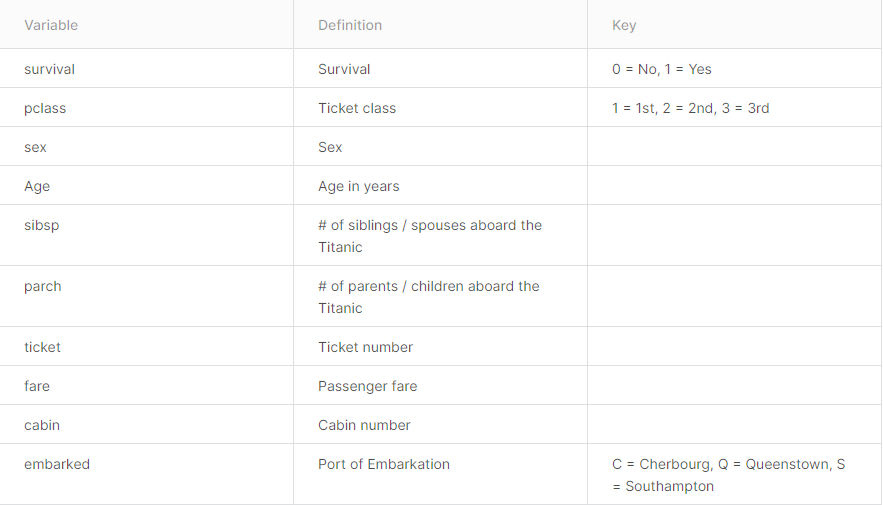

**EDA 목표**
    1. 주어진 각 feature (column) 들의 분포 살펴보기.
    2. 생존자/사망자 별로 데이터를 분리해 살펴보기.
    3. 어떤 정보를 통해 생존율을 예측할 수 있을지, 가설을 세우고 실제 그래프로 검증.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

**데이터 불러오기**

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**load_dataset으로 불러오는 데이터들 같은 경우, <br>
info()를 통해 column들의 대략적인 정보를 확인할 수 있다.**

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**마찬가지로, head()와 tail()을 통해<br>
데이터셋의 상단 5개, 하단 5개의 데이터를 직접 볼 수 있다.**

In [7]:
titanic_df.head()
# titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**DataFrame.columns 를 통해 column이 무엇인지 확인할 수도 있음. <br>
(지금까지 내가 주로 썼던 방법.)**

In [8]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**범주형 column과 수치형 column을 구분해서 저장한다.**

In [9]:
category_cols = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

**기술 통계량 확인<br>**
    * DataFrame.describe()를 통해 수치형 column들의 기술통계량을 확인할 수 있음.

In [10]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**DataFrame.value_counts()를 통해 각 column별 몇 개의 row가 있는지 셀 수 있음.**

In [12]:
# column이 여러개이므로, for loop를 통해 한번에 셀 수 있음.
for col in category_cols :
    print(col + ' Count : ')
    print(titanic_df.loc[:, col].value_counts())
    print()

sex Count : 
male      577
female    314
Name: sex, dtype: int64

embarked Count : 
S    644
C    168
Q     77
Name: embarked, dtype: int64

class Count : 
Third     491
First     216
Second    184
Name: class, dtype: int64

who Count : 
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male Count : 
True     537
False    354
Name: adult_male, dtype: int64

deck Count : 
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town Count : 
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive Count : 
no     549
yes    342
Name: alive, dtype: int64

alone Count : 
True     537
False    354
Name: alone, dtype: int64



**데이터 분포 눈으로 살피기**<br>
        - 기술통계량과 빈도수를 확인해봤으니, 그래프 시각화를 통해 더 직관적으로 확인.
* for loop을 이용해 여러 차트를 그릴 준비,
* plt.subplots를 통해 여러 개의 차트를 담을 밑판 생성. 크기는 nrows * ncols
* 각 ax마다 seaborn으로 차트를 생성.

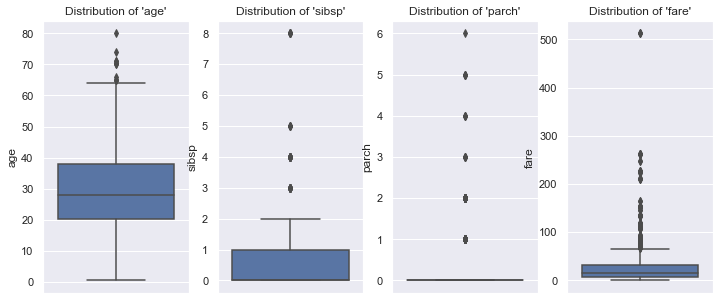

In [22]:
# 기술 통계량은 boxplot으로 확인.
fig, ax_list = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(12, 5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, ax=ax_list[i])
    ax_list[i].set_title(f"Distribution of '{col}'")

- Numerical column들의 분포를 boxplot으로 확인했으니,
- Categorical column들의 분포를 countplot으로 확인.

(3, 3)
(9,)


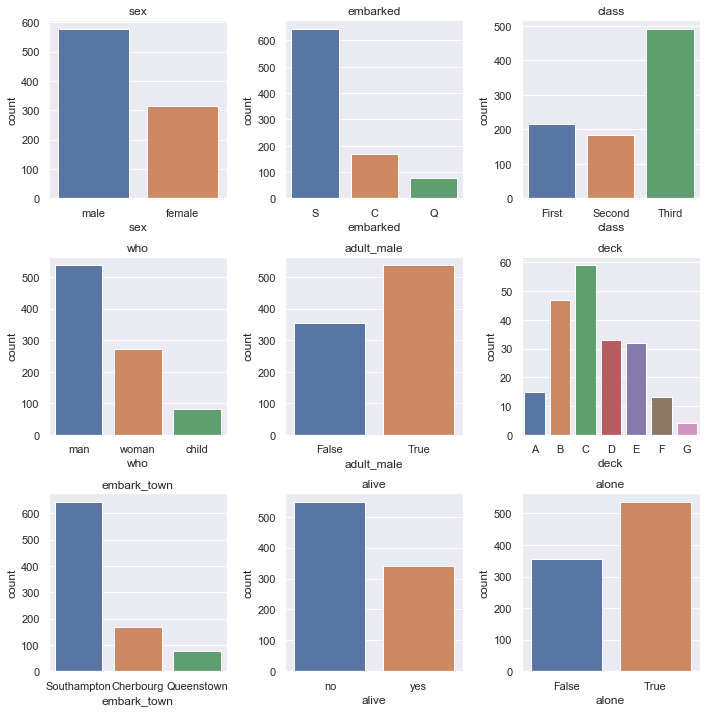

In [27]:
fig2, ax_list2 = plt.subplots(nrows=3, ncols=3)
fig2.set_size_inches(10, 10)

# 다차원 행렬의 차원을 변형.
# axis가 현재 3*3 인 2차원. --> 이를 9인 1차원으로 바꿈.
ax_list_new = ax_list2.reshape(9)
print(ax_list2.shape)
print(ax_list_new.shape)

for i in range(len(category_cols)) :
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list_new[i])
    ax_list_new[i].set_title(col)

plt.tight_layout()

**성별과 생존 여부 간 관계가 있을까?**
    - 단순히 그림을 그려 봐보자.
    - 상관계수를 구해서 확인해볼 수도 있을것.
    - 아직 이 진도는 안나갔으니 여기에 별도로 하진 X.

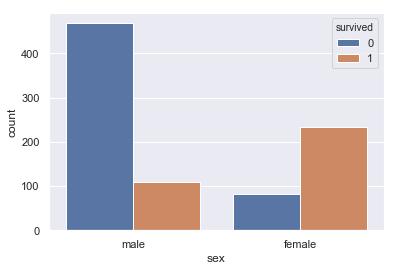

In [28]:
sns.countplot(data=titanic_df, x='sex', hue='survived')

**좌석 등급과 생존 여부 간 관계가 있을까?**

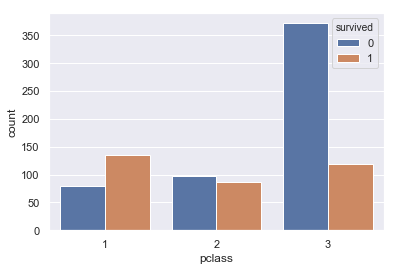

In [29]:
sns.countplot(data=titanic_df, x='pclass', hue='survived')

**응용해서, 9개 범주형 column에 대해 생존 여부를 그래프로 그려보자.**

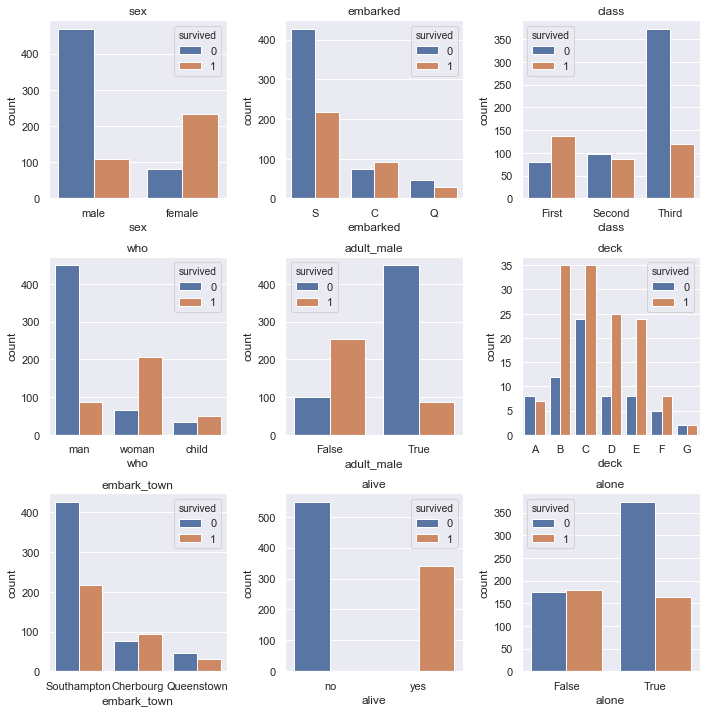

In [31]:
fig, ax_list = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(10, 10)

ax_list_new = ax_list.reshape(9)

for i in range(len(category_cols)) :
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list_new[i], hue='survived')
    ax_list_new[i].set_title(col)

plt.tight_layout()

* 혼자 탄 사람들의 생존률이 좀 낮음.
* 남자, 아이보다 여자의 생존률이 좀 더 높음.
* 3등석에 탄 사람들의 생존률이 많이 낮음. 
    * 1 > 2 > 3 순서.
* 성인 남성은 많이 생존하지 못한것으로 보임.
* B, C, D, E deck에 있던 사람들이 많이 생존한 것으로 보임.